In [1]:
%matplotlib inline

In [26]:
#parallel
from ipyparallel import Client
rc = Client(profile="default")
dview = rc[:] # use all engines
lv = rc.load_balanced_view()

In [27]:
%%px --local
import os, json
import pandas as pd
import numpy as np
import scipy
#from numpy import *
import matplotlib as mpl
from matplotlib import pyplot as plt
import itertools
converter =  mpl.colors.ColorConverter()
mpl.rcParams["font.size"]=14
eu = os.path.expanduser
jn = os.path.join
meta_dir = eu("~/vervet_project/metadata")
figure_dir = eu("~/VervetPopgen/Figures")
var_ana_dir = eu("~/vervet_project/analyses/20150504_163_UnifiedGenotyper/_data")
msmc_ana_dir = eu("~/vervet_project/analyses/20160314_UG_msmc/_data")
manuscript_dir2 = eu("~/VervetPopgen/Manuscript/VervetPopgen_man_0_2")

autosomes = ["CAE" + str(i) for i in range(1,30)]
pops = ["aet","cyn","pyn","pys","sab","tan"]
colors = ["blue","magenta","cyan","green","orange","red"]
light_colors = [tuple([min(1,v) for v in  np.array(converter.to_rgb(c))+0.1]) for c in colors] 
pops3 = ["aet","cyn","pyn","pys","sab","sac","sar","tan"]
colors3 = ["blue","magenta","cyan","green","orange","yellow","brown","red"]
light_colors3 = [tuple([min(1,v) for v in  np.array(converter.to_rgb(c))+0.1]) for c in colors3] 
pops = ["aet","cyn","pyn","pys","sab","tan"]

In [28]:
%%px --local
import ast
def str_to_dic(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        print s
        raise
mt = pd.read_csv(jn(meta_dir,"163_master_table.csv"),
                 index_col=0,
                 converters={"library":str_to_dic,"phenotypes":str_to_dic}
                 )

## Choose tuples

In [29]:
def get_highest_cof(df,n):
    return df.sort("coverage",ascending=False).iloc[:n]


country_top_cov = mt.groupby("country").apply(lambda df: get_highest_cof(df,2))

In [30]:
compare_cov_tuples = [('VSAA2010',), ('VSAA2015',), ('VSAA2020',), ('VSAA2010', 'VSAA2020')]
pyg_cyn_split_tuples = [["AG5417","VSAM0021"],["AG5417","VZA3008"],["VSAM0021","VZA3008"]]
sab_tan_split_tuples = [("VGHA1001","AGM141"),("VGA00025","AGM141"), ("VGA00025","VGHA1001")]
tan_cyn_pys_tuples = [("AGM141",id) for id in  [u'VSAM0021', u'VZA3008', u'VBOA1005']]


pygcyn_countries = ["South Africa","Kenya", "Tanzania", "Zambia", "Botswana"]
sabtan_countries = ["Gambia","Ghana", "Central African Republic", "Nevis", "Barbados","Saint Kitts"]

pygcyn_country_tuples = [list(country_top_cov.loc[c].index) for c in pygcyn_countries]
pygcyn_quadruples = [j[0] + j[1] for j in [i for i in itertools.combinations(pygcyn_country_tuples,2)]]
print pygcyn_quadruples
sabtan_country_tuples = [list(country_top_cov.loc[c].index) for c in sabtan_countries]
sabtan_quadruples = [j[0] + j[1] for j in [i for i in itertools.combinations(sabtan_country_tuples,2)]]
print sabtan_quadruples

[['VSAM0021', 'VSAF1011', 'VKA3', 'VKD7'], ['VSAM0021', 'VSAF1011', 'AG5417', 'AG23'], ['VSAM0021', 'VSAF1011', 'VZA3008', 'VZA1004'], ['VSAM0021', 'VSAF1011', 'VBOA1005', 'VBOA1003'], ['VKA3', 'VKD7', 'AG5417', 'AG23'], ['VKA3', 'VKD7', 'VZA3008', 'VZA1004'], ['VKA3', 'VKD7', 'VBOA1005', 'VBOA1003'], ['AG5417', 'AG23', 'VZA3008', 'VZA1004'], ['AG5417', 'AG23', 'VBOA1005', 'VBOA1003'], ['VZA3008', 'VZA1004', 'VBOA1005', 'VBOA1003']]
[['VGA00025', 'VGA00006', 'VGHA1001', 'VGHB1002'], ['VGA00025', 'VGA00006', 'AGM141', 'AGM131'], ['VGA00025', 'VGA00006', 'VWP10067', 'VWP10008'], ['VGA00025', 'VGA00006', 'B5616', 'C2166'], ['VGA00025', 'VGA00006', 'VWP00393', 'VWP00494'], ['VGHA1001', 'VGHB1002', 'AGM141', 'AGM131'], ['VGHA1001', 'VGHB1002', 'VWP10067', 'VWP10008'], ['VGHA1001', 'VGHB1002', 'B5616', 'C2166'], ['VGHA1001', 'VGHB1002', 'VWP00393', 'VWP00494'], ['AGM141', 'AGM131', 'VWP10067', 'VWP10008'], ['AGM141', 'AGM131', 'B5616', 'C2166'], ['AGM141', 'AGM131', 'VWP00393', 'VWP00494'], 

In [31]:
country_top1_cov = mt.groupby("country").apply(lambda df: get_highest_cof(df,1))

In [8]:
aet_tan_pyg_top1 = country_top1_cov.ix[["Central African Republic","Ethiopia","Kenya","Tanzania"]].index.droplevel(0)
aet_tan_pyg_tuples = [t for t in itertools.combinations(aet_tan_pyg_top1,2)]

In [9]:
all_split_tuples = pyg_cyn_split_tuples + sab_tan_split_tuples + aet_tan_pyg_tuples + aet_tan_pyg_tuples 

In [10]:
for t0,t1 in all_split_tuples:
    print mt.loc[t0,"country"], mt.loc[t1,"country"]

Tanzania South Africa
Tanzania Zambia
South Africa Zambia
Ghana Central African Republic
Gambia Central African Republic
Gambia Ghana
Central African Republic Ethiopia
Central African Republic Kenya
Central African Republic Tanzania
Ethiopia Kenya
Ethiopia Tanzania
Kenya Tanzania
Central African Republic Ethiopia
Central African Republic Kenya
Central African Republic Tanzania
Ethiopia Kenya
Ethiopia Tanzania
Kenya Tanzania


In [401]:
for el in sabtan_quadruples:
    print el[0],

VGA00025 VGA00025 VGA00025 VGA00025 VGA00025 VGHA1001 VGHA1001 VGHA1001 VGHA1001 AGM141 AGM141 AGM141 VWP10067 VWP10067 B5616


In [404]:
for s in set([el[0] for el in sabtan_quadruples]):
    print s,

VGA00025 B5616 VWP10067 VGHA1001 AGM141


In [11]:
bostwana_id = "VBOA1005"
botswana_pyg_cyn_split_tuples = [["AG5417",bostwana_id],["VZA3008",bostwana_id],["VSAM0021",bostwana_id]]

,country,orig_quality_format,species,phenotypes,age,age_cas,age_approx,site,longitude,latitude,coverage,library,pop3,pop_marker,population,pop2
ucla_id,,,,,,,,,,,,,,,,
VBOA1003,Botswana,phred33,Chlorocebus pygerythrus pygerythrus,{},NaN,NaN,Adult,UnknownBotswana,27.7,-21.9,4.0,{u'gerald_C0RKNACXX_8_CATTTT': {u'path_mate1_p...,pys,grn_circle,pyg,pys
VBOA1005,Botswana,phred33,Chlorocebus pygerythrus pygerythrus,{},NaN,NaN,Yearling,UnknownBotswana,27.7,-21.9,4.9,{u'gerald_C0RDDACXX_8_AGGTTT': {u'path_mate1_p...,pys,grn_circle,pyg,pys


In [70]:
botwana_pyg_cyn_split_tuples

[['AG5417', 'VBOA1005'], ['VZA3008', 'VBOA1005'], ['VSAM0021', 'VBOA1005']]

In [20]:
autosomes

['CAE1',
 'CAE2',
 'CAE3',
 'CAE4',
 'CAE5',
 'CAE6',
 'CAE7',
 'CAE8',
 'CAE9',
 'CAE10',
 'CAE11',
 'CAE12',
 'CAE13',
 'CAE14',
 'CAE15',
 'CAE16',
 'CAE17',
 'CAE18',
 'CAE19',
 'CAE20',
 'CAE21',
 'CAE22',
 'CAE23',
 'CAE24',
 'CAE25',
 'CAE26',
 'CAE27',
 'CAE28',
 'CAE29']

In [39]:
%%px --local
#take the sites from df but add the genotypes from phase df
def make_phased_input(id):
    errors = []
    for chrom in ["CAE22"]:
        try:
            df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
            #phase df can have some more entries (sites where the genotype is missing in the original df)
            phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
            df[3] = phase_df.ix[df.index][3]
            #attention this is not correct, since the distance for the dropped values should be added to the ones above
            df.dropna(inplace=True)
            df.to_csv(jn(msmc_ana_dir,"msmc_input_{}_phased_{}.tsv".format(id,chrom)),sep="\t",header=None)
        except Exception, e:
            errors.append(str(e))
    return errors

In [19]:
tan_cyn_pys_tuples

[('AGM141', u'VSAM0021'), ('AGM141', u'VZA3008'), ('AGM141', u'VBOA1005')]

In [40]:
map_make_phased = lv.map_async(make_phased_input, ["_".join(s) for s in tan_cyn_pys_tuples])

In [42]:
map_make_phased.wait(10)

In [43]:
map_make_phased.result

[[], [], []]

## Plot results

In [56]:
mu=1.5e-8
generation_time = 8.5

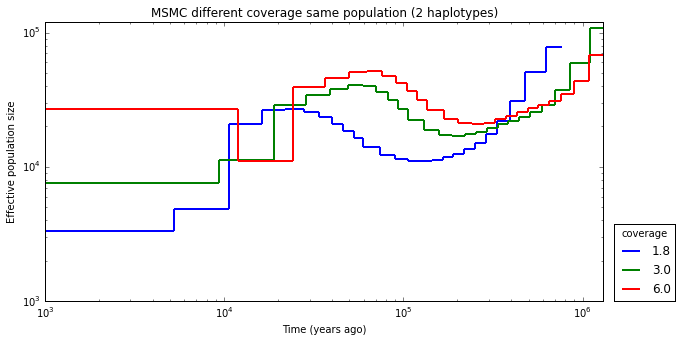

In [27]:
# Two haplotypes
ids = [('VSAA2010',), ('VSAA2020',),('VSAA2015',)]
ids = ["_".join(t) for t in ids]
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
#jet = cm = plt.get_cmap('jet') 
#cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
#scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    #colorVal = scalarMap.to_rgba(i)
    cov = mt.ix[id.split("_")]["coverage"].values[0]
    #if pop not in pops: #only plot African
    #    continue
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    #time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=cov,color=mpl.rcParams['axes.color_cycle'][i]) 
    ax.add_collection(lc)
#id_tuple = ("VSAA2010","VSAA2020")
#id = "_".join(id_tuple)
#pair = 0
#haplo_str = "".join([str(j) for j in range(pair,len(id_tuple)*2,2)])
#time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}_haplo{}.final.txt".format(id,haplo_str)),sep="\t",index_col=0)
#time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
#time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
#lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
#lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
#lc = mpl.collections.LineCollection(lines, linewidths=2,label="/".join([str(f) for f in mt.ix[id.split("_")]["coverage"].values]),color=mpl.rcParams['axes.color_cycle'][i+1]) 
#ax.add_collection(lc)
    
ax.set_xlim([0.1*10**4,1.3*10**6])
ax.set_ylim([1000,1.2*10**5])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc=(1.02,0), title="coverage")
plt.title("MSMC different coverage same population (2 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")

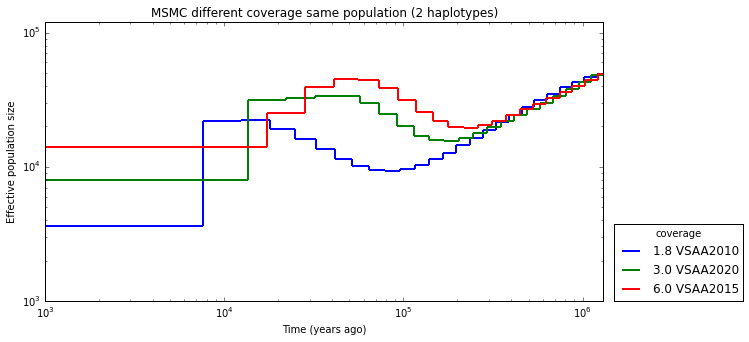

In [31]:
# Two haplotypes
ids = [('VSAA2010',), ('VSAA2020',),('VSAA2015',)]
ids = ["_".join(t) for t in ids]
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
#jet = cm = plt.get_cmap('jet') 
#cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
#scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    #colorVal = scalarMap.to_rgba(i)
    cov = mt.ix[id.split("_")]["coverage"].values[0]
    #if pop not in pops: #only plot African
    #    continue
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc2_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    #time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=str(cov)+" " + id ,color=mpl.rcParams['axes.color_cycle'][i]) 
    ax.add_collection(lc)
#id_tuple = ("VSAA2010","VSAA2020")
#id = "_".join(id_tuple)
#pair = 0
#haplo_str = "".join([str(j) for j in range(pair,len(id_tuple)*2,2)])
#time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}_haplo{}.final.txt".format(id,haplo_str)),sep="\t",index_col=0)
#time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
#time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
#lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
#lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
#lc = mpl.collections.LineCollection(lines, linewidths=2,label="/".join([str(f) for f in mt.ix[id.split("_")]["coverage"].values]),color=mpl.rcParams['axes.color_cycle'][i+1]) 
#ax.add_collection(lc)
    
ax.set_xlim([0.1*10**4,1.3*10**6])
ax.set_ylim([1000,1.2*10**5])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc=(1.02,0), title="coverage")
plt.title("MSMC different coverage same population (2 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")

In [ ]:
Test separation

In [ ]:
sep_ids = ("VSAA2010", "VSAA2020")

In [ ]:
time_df_within_0 = pd.read_csv(jn(msmc_ana_dir,"msmc_out_within__{}.final.txt".format(id)),sep="\t",index_col=0)
time_df_within_1 = pd.read_csv(jn(msmc_ana_dir,"msmc_out_within__{}.final.txt".format(id)),sep="\t",index_col=0)

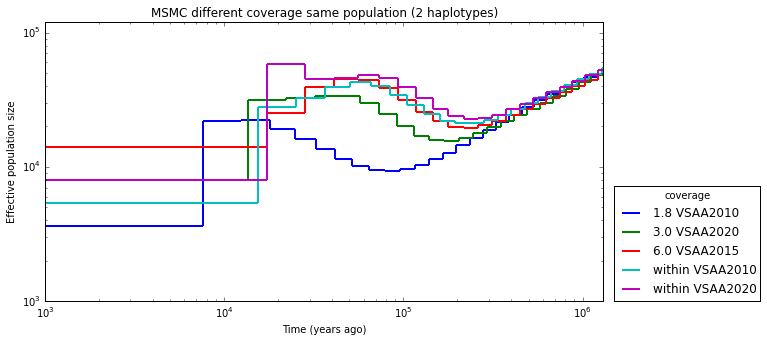

In [34]:
# Two haplotypes
ids = [('VSAA2010',), ('VSAA2020',),('VSAA2015',)]
ids = ["_".join(t) for t in ids]
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
#jet = cm = plt.get_cmap('jet') 
#cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
#scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    #colorVal = scalarMap.to_rgba(i)
    cov = mt.ix[id.split("_")]["coverage"].values[0]
    #if pop not in pops: #only plot African
    #    continue
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc2_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    #time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=str(cov)+" " + id ,color=mpl.rcParams['axes.color_cycle'][i]) 
    ax.add_collection(lc)
    
for j,id in enumerate(("VSAA2010", "VSAA2020")):
    #colorVal = scalarMap.to_rgba(i)
    cov = mt.ix[id.split("_")]["coverage"].values[0]
    #if pop not in pops: #only plot African
    #    continue
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_within_{}.final.txt".format(id)),sep="\t",index_col=0)
    #time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label="within " + id ,color=mpl.rcParams['axes.color_cycle'][i+j+1]) 
    ax.add_collection(lc)

    
ax.set_xlim([0.1*10**4,1.3*10**6])
ax.set_ylim([1000,1.2*10**5])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc=(1.02,0), title="coverage")
plt.title("MSMC different coverage same population (2 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")

In [ ]:
Conclusion: something strange happens when the low coverage one is extracted alone?
    Bug in the input file creation?

In [ ]:
separation

In [25]:
from scipy import interpolate

In [50]:
def read_time_df(fn):
    epsilon = 0.0000001
    try:
        df = pd.read_csv(fn,sep="\t",index_col=[0])
    except IOError, e:
        print e
        return
    df["left_time_boundary"] = df["left_time_boundary"] + epsilon
    df["right_time_boundary"] = df["right_time_boundary"] - epsilon
    sl = df.set_index("left_time_boundary")["lambda"]
    sr = df.set_index("right_time_boundary")["lambda"]
    s = pd.concat([sl,sr])    
    return pd.DataFrame(s.sort_index())
def read_time_df_midpoint(fn):
    df = pd.read_csv(fn,sep="\t",index_col=[0])
    df["mid_time"] = (df["left_time_boundary"] + df["right_time_boundary"])/2
    s = df.set_index("mid_time")["lambda"]
    return pd.DataFrame(s.sort_index())

In [51]:
def get_cross_coal(id0,id1):
    time_df0 = read_time_df(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id0)))
    time_df1 = read_time_df(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id1)))
    time_df_cross = read_time_df(jn(msmc_ana_dir,"msmc2_out_{}_{}_sep.final.txt".format(id0,id1,id0)))
    joined_df = time_df0.join(time_df1,lsuffix='_0', rsuffix='_1',how="outer").join(time_df_cross,how="outer").interpolate()
    #joined_df = joined_df.ix[time_df_cross.index]
    cross_coal = 2*joined_df['lambda']/(joined_df['lambda_0']+joined_df['lambda_1'])
    
    return cross_coal

def get_cross_coal_midpoint(id0,id1):
    id0 = ids[0]
    id1 = ids[1]
    time_df0 = read_time_df_midpoint(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id0))).iloc[:-1]
    time_df1 = read_time_df_midpoint(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id1))).iloc[:-1]
    time_df_cross = read_time_df_midpoint(jn(msmc_ana_dir,"msmc2_out_{}_{}_sep.final.txt".format(id0,id1,id0))).iloc[:-5]
    f0 = interpolate.interp1d(list(time_df0.index.values), time_df0['lambda'].values,kind='slinear',bounds_error=False)
    f1 = interpolate.interp1d(list(time_df1.index.values), time_df1['lambda'].values,kind='slinear',bounds_error=False)
    time_df_cross["lambda0"] = f0(time_df_cross.index)
    time_df_cross["lambda1"] = f1(time_df_cross.index)
    time_df_cross['cross_coal'] = 2*time_df_cross['lambda']/(time_df_cross['lambda0']+time_df_cross['lambda1'])
    return time_df_cross

def read_time_df_interpolate(fn):
    df = pd.read_csv(fn,sep="\t",index_col=[0])
    return df

def interpolate_time_df(time_df):
    x = [0.0] + list((time_df['left_time_boundary']+time_df['right_time_boundary']).values/2.)
    y = [0.0] + list(time_df['lambda'].values)
    return interpolate.interp1d(x,y,kind='slinear',bounds_error=False)

def get_cross_coal_interpolate(id0,id1):
    time_df_cross = read_time_df_interpolate(jn(msmc_ana_dir,"msmc2_out_{}_{}_sep.final.txt".format(id0,id1,id0))).iloc[:-5]
    time_df0 = read_time_df_interpolate(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id0))).iloc[:-1]
    time_df1 = read_time_df_interpolate(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id1))).iloc[:-1]

    f0 = interpolate_time_df(time_df0)
    f1 = interpolate_time_df(time_df1)

    #add res number of points in the interval
    res = 5
    tot_df = pd.DataFrame()
    for i in range(res):
        ix = time_df_cross["left_time_boundary"] + (time_df_cross["right_time_boundary"]-time_df_cross["left_time_boundary"])*1.*i/res
        df = pd.DataFrame({'lambda':time_df_cross['lambda'].values,
                      'lambda0':f0(ix.values),
                     'lambda1':f1(ix.values)},index=ix.values)
        tot_df = pd.concat([tot_df,df])
    tot_df['cross_coal'] = 2.*tot_df['lambda']/(tot_df['lambda0']+tot_df['lambda1'])
    tot_df.sort_index(inplace=True)
    
    return tot_df

def get_cross_coal_step(id0,id1):
    """
    Use cross intervals and take one single value (midpoint for within values)
    """
    time_df_cross = read_time_df_interpolate(jn(msmc_ana_dir,"msmc2_out_{}_{}_sep.final.txt".format(id0,id1,id0))).iloc[:-5]
    time_df0 = read_time_df_interpolate(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id0))).iloc[:-1]
    time_df1 = read_time_df_interpolate(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id1))).iloc[:-1]

    f0 = interpolate_time_df(time_df0)
    f1 = interpolate_time_df(time_df1)

    #add res number of points in the interval
    res = 5
    
    ix = time_df_cross["left_time_boundary"] + (time_df_cross["right_time_boundary"]-time_df_cross["left_time_boundary"])*1.*i/res
    time_df_cross['lambda0'] = f0(ix.values)
    time_df_cross['lambda1'] = f1(ix.values)
    time_df_cross['cross_coal'] = 2.*time_df_cross['lambda']/(time_df_cross['lambda0']+time_df_cross['lambda1'])
    return time_df_cross


#for ids in pyg_cyn_split_tuples:
#    cross_coal_s = get_cross_coal_step(*ids)['cross_coal']
#    cross_coal_s.index = cross_coal_s.index*generation_time/mu
#    cross_coal_s.name = mt.ix[list(ids)]["country"].values
#    cross_coal_s.plot(legend=True)#  cross_coal_s.iloc[:-50].plot()#
#    ax = plt.gca()

(0, 500000)

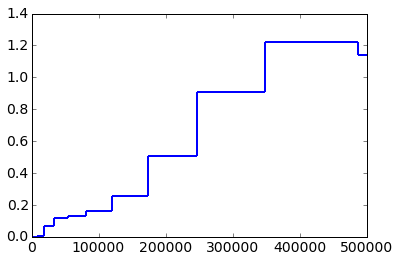

In [318]:
cross_coal = get_cross_coal_step(*ids)
cross_coal[["left_time_boundary","right_time_boundary"]] = cross_coal[["left_time_boundary","right_time_boundary"]]*generation_time/mu
ax = plt.gca()
lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in cross_coal.iterrows()]
lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
lc = mpl.collections.LineCollection(lines, linewidths=2) 
ax.add_collection(lc)
ax.set_ylim([0,1.4])
ax.set_xlim([0,500000])

In [157]:
res = 10
for i, (tl, tr, l) in enumerate(zip(cc.times_left, cc.times_right, cc.lambdas[0])):
    lambda00 = 0.0
    lambda11 = 0.0
    for j in range(res):
        t = tl + j / float(res) * (tr - tl)
        if t <= interp1_min:
            l00 = within1.lambdas[0][0]
        elif t >= interp1_max:
            l00 = within1.lambdas[0][-1]
        else:
            l00 = interp1(t)

        if t <= interp2_min:
            l11 = within2.lambdas[0][0]
        elif t >= interp2_max:
            l11 = within2.lambdas[0][-1]
        else:
            l11 = interp2(t)
        
        lambda00 += l00 / float(res)
        lambda11 += l11 / float(res)

array([ 0.71653131,  0.51341712,  0.36787944])

In [54]:
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

In [189]:
id0 = ids[0]
id1 = ids[1]
time_df0 = read_time_df(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id0))).iloc[:-1]
time_df1 = read_time_df(jn(msmc_ana_dir,"msmc2_out_{}_{}_within_{}.final.txt".format(id0,id1,id1))).iloc[:-1]
time_df_cross = read_time_df(jn(msmc_ana_dir,"msmc2_out_{}_{}_sep.final.txt".format(id0,id1,id0))).iloc[:-5]
f0 = interpolate.interp1d(list(time_df0.index.values), time_df0['lambda'].values,kind='linear')
f1 = interpolate.interp1d(list(time_df1.index.values), time_df1['lambda'].values,kind='linear')
time_df_cross["lambda0"] = f0(time_df_cross.index)
time_df_cross["lambda1"] = f1(time_df_cross.index)
cross_coal = 2*time_df_cross['lambda']/(time_df_cross['lambda0']+time_df_cross['lambda1'])

In [92]:
ids = ("AG5417","VSAM0021")

/home/GMI/hannes.svardal/lib/python/virtualenvs/ver/lib/python2.7/site-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


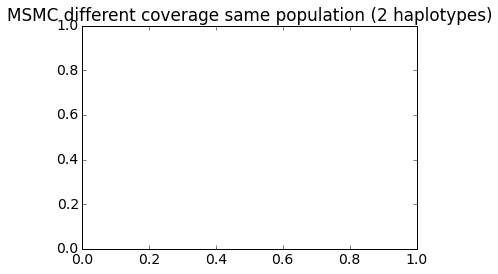

In [134]:
def plot_cross_coal(cross_coal_s):
    ax = plt.gca()
    cross_coal_s = cross_coal_s*generation_time/mu
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=cov,color=mpl.rcParams['axes.color_cycle'][i]) 
    ax.add_collection(lc)
#id_tuple = ("VSAA2010","VSAA2020")
#id = "_".join(id_tuple)
#pair = 0
#haplo_str = "".join([str(j) for j in range(pair,len(id_tuple)*2,2)])
#time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}_haplo{}.final.txt".format(id,haplo_str)),sep="\t",index_col=0)
#time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
#time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
#lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
#lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
#lc = mpl.collections.LineCollection(lines, linewidths=2,label="/".join([str(f) for f in mt.ix[id.split("_")]["coverage"].values]),color=mpl.rcParams['axes.color_cycle'][i+1]) 
#ax.add_collection(lc)
    
ax.set_xlim([0.1*10**4,1.3*10**6])
ax.set_ylim([1000,1.2*10**5])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc=(1.02,0), title="coverage")
plt.title("MSMC different coverage same population (2 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")

In [120]:
 pyg_cyn_split_tuples

[['AG5417', 'VSAM0021'], ['AG5417', 'VZA3008'], ['VSAM0021', 'VZA3008']]

In [127]:
pyg_cyn_split_tuples[:-1]

[['AG5417', 'VSAM0021'], ['AG5417', 'VZA3008']]

In [196]:
cross_coal_s = get_cross_coal_interpolate(*ids)

In [525]:
cross_coal_s.plot?

In [47]:
import colorbrewer

In [60]:
colors = [[i/255. for i in j] for j in colorbrewer.Dark2[5]]

In [63]:
colors

[[0.10588235294117647, 0.6196078431372549, 0.4666666666666667],
 [0.8509803921568627, 0.37254901960784315, 0.00784313725490196],
 [0.4588235294117647, 0.4392156862745098, 0.7019607843137254],
 [0.9058823529411765, 0.1607843137254902, 0.5411764705882353],
 [0.4, 0.6509803921568628, 0.11764705882352941]]

In [69]:
styles = ["-","--","-.",":"]

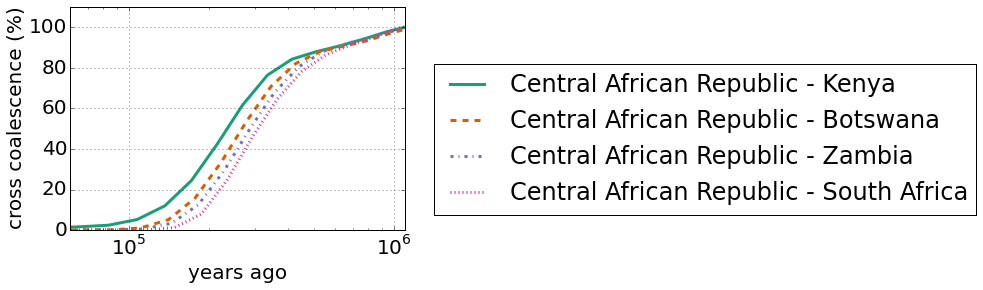

In [73]:
for ids,c,s in zip([aet_tan_pyg_tuples[1]]+tan_cyn_pys_tuples[::-1],colors,styles):
    cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']*100.
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = " - ".join(mt.ix[list(ids)]["country"].values)
    cross_coal_s.plot(legend=True,linewidth=3,style=s,color=c)
ax = plt.gca()
ax.set_xlim([60000,1100000])
ax.set_ylim([0,110])
ax.set_xscale('log')
l = ax.get_legend()
l.set_bbox_to_anchor((1.05, 0.8))
ax.set_xlabel("years ago")
ax.set_ylabel("cross coalescence (%)")

plt.savefig(jn(manuscript_dir2,"supplement/figures","msmc2_tan_cyn_pyg.pdf"),bbox_inches='tight',transparent=True)

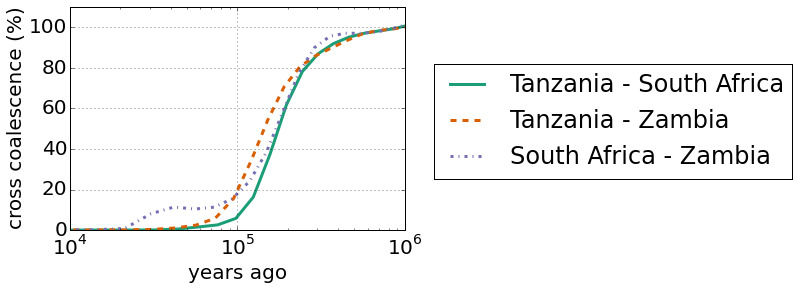

In [72]:
for ids,c,s in zip(pyg_cyn_split_tuples,colors,styles):
    cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']*100.
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = " - ".join(mt.ix[list(ids)]["country"].values)
    cross_coal_s.plot(legend=True,linewidth=3,style=s,color=c)
ax = plt.gca()
ax.set_xlim([10000,1000000])
ax.set_ylim([0,110])
ax.set_xscale('log')
l = ax.get_legend()
l.set_bbox_to_anchor((1.05, 0.8))
ax.set_xlabel("years ago")
ax.set_ylabel("cross coalescence (%)")

plt.savefig(jn(manuscript_dir2,"supplement/figures","msmc2_tanzania_zambia_south_africa.pdf"),bbox_inches='tight',transparent=True)

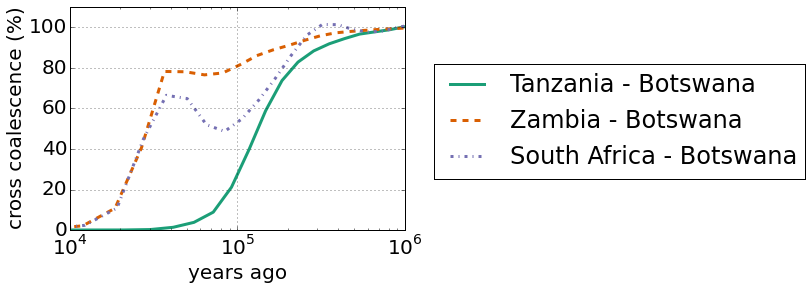

In [75]:
for ids,c,s in zip(botswana_pyg_cyn_split_tuples,colors,styles):
    cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']*100.
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = " - ".join(mt.ix[list(ids)]["country"].values)
    cross_coal_s.plot(legend=True,linewidth=3,style=s,color=c)
ax = plt.gca()
ax.set_xlim([10000,1000000])
ax.set_ylim([0,110])
ax.set_xscale('log')
l = ax.get_legend()
l.set_bbox_to_anchor((1.05, 0.8))
ax.set_xlabel("years ago")
ax.set_ylabel("cross coalescence (%)")

plt.savefig(jn(manuscript_dir2,"supplement/figures","msmc2_tanzania_zambia_botswana_south_africa.pdf"),bbox_inches='tight',transparent=True)

In [361]:
botswana_pyg_cyn_split_tuples

[['AG5417', 'VBOA1005'], ['VZA3008', 'VBOA1005'], ['VSAM0021', 'VBOA1005']]

In [362]:
mt.ix['VBOA1005']

country                                                         Botswana
orig_quality_format                                              phred33
species                              Chlorocebus pygerythrus pygerythrus
phenotypes                                                            {}
age                                                                  NaN
age_cas                                                              NaN
age_approx                                                      Yearling
site                                                     UnknownBotswana
longitude                                                           27.7
latitude                                                           -21.9
coverage                                                             4.9
library                {u'gerald_C0RDDACXX_8_AGGTTT': {u'path_mate1_p...
pop3                                                                 pys
pop_marker                                         

AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

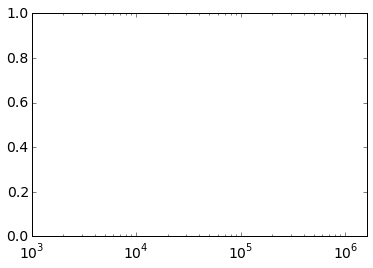

In [26]:
for ids in botswana_pyg_cyn_split_tuples+pyg_cyn_split_tuples:
    try:
        cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']
        cross_coal_s.index = cross_coal_s.index*generation_time/mu
        cross_coal_s.name = mt.ix[list(ids)]["country"].values
        cross_coal_s.plot(legend=True)
    except:
        pass
    


errors = []
for tpl in pygcyn_quadruples:
    try:
        ids = ["_".join(tpl[:2]),"_".join(tpl[2:])]
        cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']
        cross_coal_s.index = cross_coal_s.index*generation_time/mu
        cross_coal_s.name = mt.ix[list(tpl)]["country"].values
        cross_coal_s.plot(legend=True)
        ax = plt.gca()
    except Exception,e:
        errors.append(e)
        
ax = plt.gca()
ax.set_xlim([1000,1600000])
ax.set_xscale('log')
l = ax.get_legend()
l.set_bbox_to_anchor((1.1, 0.7))        
        
        
#ax.set_xlim([2000,300000])
#ax.set_xscale('log')
#l = ax.get_legend()
#l.set_bbox_to_anchor((1.1, 0.7))

In [496]:
mt.ix["VZA1004"]["country"]

'Zambia'

In [489]:
errors

[IOError('File /home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VSAM0021_VSAF1011_VKA3_VKD7_sep.final.txt does not exist'),
 IOError('File /home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VSAM0021_VSAF1011_AG5417_AG23_sep.final.txt does not exist'),
 IOError('File /home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VSAM0021_VSAF1011_VZA3008_VZA1004_sep.final.txt does not exist'),
 IOError('File /home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VSAM0021_VSAF1011_VBOA1005_VBOA1003_sep.final.txt does not exist'),
 IOError('File /home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VKA3_VKD7_VZA3008_VZA1004_sep.final.txt does not exist'),
 IOError('File /home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_AG5417_AG23_VZA3008_VZA1004_sep.final.txt does not exist'),
 IOError('File /home/GMI/hannes.svardal/verv

In [72]:
mpl.rcParams["font.size"]=20

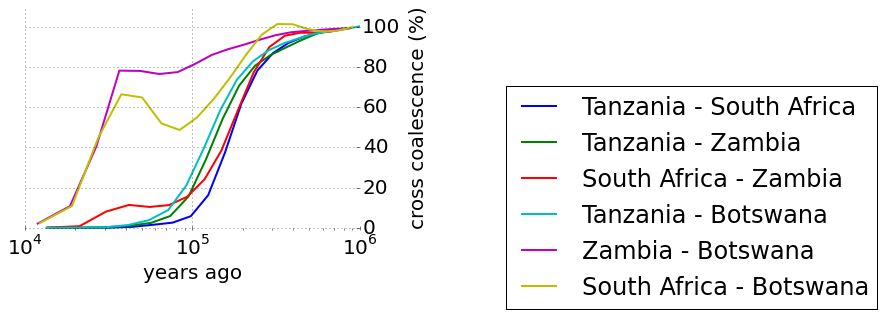

In [627]:
xmin = 10000
xmax = 1000000
for ids in pyg_cyn_split_tuples+botswana_pyg_cyn_split_tuples:
    cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']*100.
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = " - ".join(mt.ix[list(ids)]["country"].values)
    cross_coal_s = cross_coal_s.loc[xmin:xmax]
    cross_coal_s.plot(legend=True,linewidth=2)
ax = plt.gca()
ax.set_xlim([xmin,xmax])
ax.set_ylim([-1,110])
ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.xaxis.tick_top()
#ax.xaxis.set_label_position('top') 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_right()
ax.yaxis.set_label_position('right')

l = ax.get_legend()
l.set_bbox_to_anchor((1.4, 0.7))
ax.set_xlabel("years ago")
ax.set_ylabel("cross coalescence (%)",labelpad=10)

#plt.savefig(jn(manuscript_dir2,"images","msmc2_pyg_cyn.svg"),bbox_inches='tight',legend=False,transparent=True)

In [652]:
from cycler import cycler
import colorbrewer

plt.rc('axes',color_cycle=[[i/255. for i in c] for c in np.array(colorbrewer.Set1[8])[[3,4,6]]])

In [647]:
set2_8=[[i/255. for i in c] for c in colorbrewer.Set2[8]]

In [650]:
colorbrewer.Set1[8]

[(228, 26, 28),
 (55, 126, 184),
 (77, 175, 74),
 (152, 78, 163),
 (255, 127, 0),
 (255, 255, 51),
 (166, 86, 40),
 (247, 129, 191)]

In [638]:
[list(mt.ix[list(ids)]["country"].values) for ids in aet_tan_pyg_tuples]

[['Central African Republic', 'Ethiopia'],
 ['Central African Republic', 'Kenya'],
 ['Central African Republic', 'Tanzania'],
 ['Ethiopia', 'Kenya'],
 ['Ethiopia', 'Tanzania'],
 ['Kenya', 'Tanzania']]

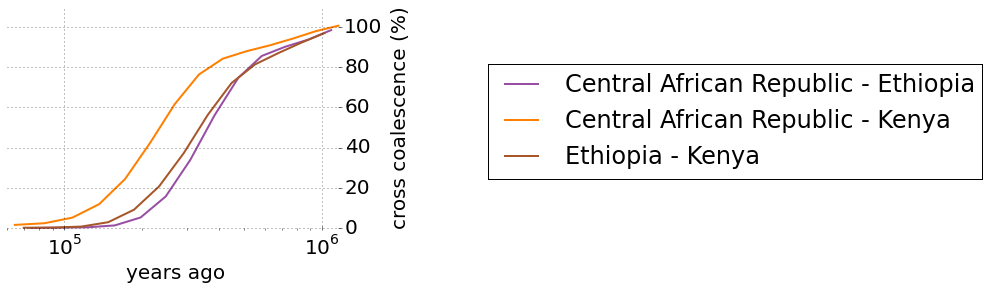

In [654]:
xmin = 60000
xmax = 1200000


for ids in np.array(aet_tan_pyg_tuples)[[0,1,3]]:
    cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']*100.
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = " - ".join(mt.ix[list(ids)]["country"].values)
    cross_coal_s = cross_coal_s.loc[xmin:xmax]
    cross_coal_s.plot(legend=True,linewidth=2)
ax = plt.gca()
ax.set_xlim([xmin,xmax])
ax.set_ylim([-1,110])
ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.xaxis.tick_top()
#ax.xaxis.set_label_position('top') 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_right()
ax.yaxis.set_label_position('right')

l = ax.get_legend()
l.set_bbox_to_anchor((1.4, 0.8))
ax.set_xlabel("years ago")
ax.set_ylabel("cross coalescence (%)",labelpad=10)

plt.savefig(jn(manuscript_dir2,"images","xmsmc2_aet_tan_pyg.svg"),bbox_inches='tight',legend=False,transparent=True)


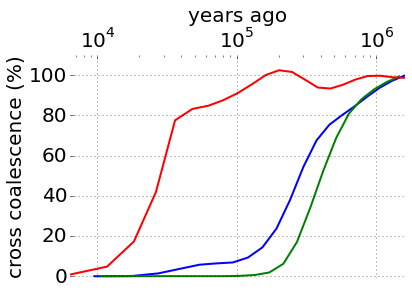

In [569]:
xmin = 6373
xmax = 1600000
for ids in sab_tan_split_tuples:
    cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']*100.
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = " - ".join(mt.ix[list(ids)]["country"].values)
    cross_coal_s = cross_coal_s.loc[xmin:xmax]
    cross_coal_s.plot(legend=False,linewidth=2)
ax = plt.gca()
ax.set_xlim([xmin,xmax])
ax.set_ylim([-1,110])
ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
#ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


#l = ax.get_legend()
#l.set_bbox_to_anchor((1.05, 0.8))
ax.set_xlabel("years ago")
ax.set_ylabel("cross coalescence (%)")

plt.savefig(jn(manuscript_dir2,"images","msmc2_sab_tan.svg"),bbox_inches='tight',legend=False,transparent=True)

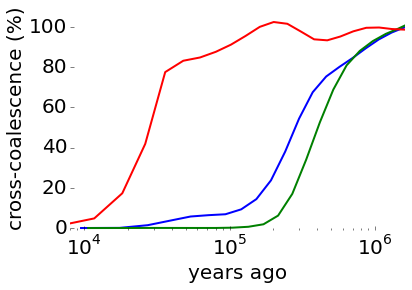

In [554]:
xmin = 8000
xmax = 1600000
for ids in sab_tan_split_tuples:
    cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']*100
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = " - ".join(mt.ix[list(ids)]["country"].values)
    plt.plot(cross_coal_s.index,cross_coal_s.values,label=cross_coal_s.name,linewidth=2)
    ax = plt.gca()
    ax.set_xlim([xmin,xmax])
ax.set_xscale('log')
ax.set_ylim([-1,110])
#l = plt.legend(loc='right')
#l.set_bbox_to_anchor((1.1, 0.7))
ax.set_xlabel("years ago",fontsize=20)
ax.set_ylabel("cross-coalescence (%)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#ax.set_axis_off()
#plt.savefig(jn(manuscript_dir2,"images","msmc2_sab_tan.svg"),bbox_inches='tight',legend=False)

In [543]:
plt.legend?

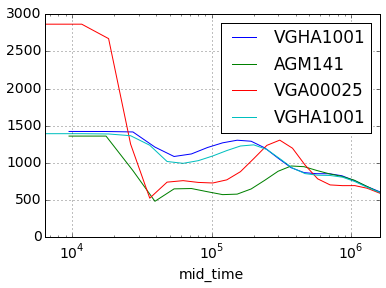

In [440]:
for ids in sab_tan_split_tuples[:1]+sab_tan_split_tuples[-1:]:
    cross_df = get_cross_coal_midpoint(*ids)
    cross_df.index = cross_df.index*generation_time/mu
    
    
    
    cross_df['lambda0'].plot(legend=True,label=ids[0])
    cross_df['lambda1'].plot(legend=True,label=ids[1])
    ax = plt.gca()
    ax.set_xlim([0,1600000])
    ax.set_xscale('log')

Runs for same individual with different partners are consistent!


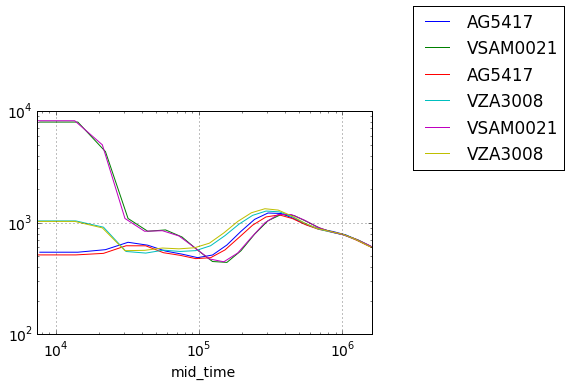

In [441]:
#check whether runs for same individual are consistent
for ids in pyg_cyn_split_tuples:
    cross_df = get_cross_coal_midpoint(*ids)
    cross_df.index = cross_df.index*generation_time/mu
    
    cross_df['lambda0'].plot(legend=True,label=ids[0])
    cross_df['lambda1'].plot(legend=True,label=ids[1])
    ax = plt.gca()
    ax.set_xlim([0,1600000])
    ax.set_xscale('log')
    ax.set_yscale('log')
    l = ax.get_legend()
    l.set_bbox_to_anchor((1.1, 0.7))
print "Runs for same individual with different partners are consistent!"

In [ ]:
for ids in pyg_cyn_split_tuples:
    cross_coal_s = get_cross_coal_midpoint(*ids)
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = mt.ix[list(ids)]["country"].values
    cross_coal_s.plot(legend=True)
    ax = plt.gca()
    ax.set_xlim([0,700000])
    ax.set_xscale('log')

In [276]:
cross_coal_s

time_index
0.000000e+00   NaN
5.666667e+08   NaN
1.133333e+09   NaN
1.700000e+09   NaN
2.266667e+09   NaN
2.833333e+09   NaN
3.400000e+09   NaN
3.966667e+09   NaN
4.533333e+09   NaN
5.100000e+09   NaN
5.666667e+09   NaN
6.233333e+09   NaN
6.800000e+09   NaN
7.366667e+09   NaN
7.933333e+09   NaN
Name: [South Africa, Zambia], dtype: float64

In [ ]:
pygcyn_quadruples

In [480]:
for ids in pyg_cyn_split_tuples:
    cross_coal_s = get_cross_coal(*ids)
    cross_coal_s.index = cross_coal_s.index*generation_time/mu
    cross_coal_s.name = mt.ix[list(ids)]["country"].values
    cross_coal_s.iloc[:-50].plot(legend=True)
    ax = plt.gca()

NameError: name 'pygcyn_split_tuples' is not defined

### 4 haplotypes

In [418]:
for tpl in pygcyn_quadruples:
    try:
        os.rename(jn(msmc_ana_dir,"msmc2_out_{}_within_{}.final.txt".format("_".join(tpl),tpl[3])),
                 jn(msmc_ana_dir,"msmc2_out_{}_within_{}.final.txt".format("_".join(tpl),"_".join(tpl[2:]))))
        os.rename(jn(msmc_ana_dir,"msmc2_out_{}_within_{}.final.txt".format("_".join(tpl),"_".join(tpl[:3]))),
                 jn(msmc_ana_dir,"msmc2_out_{}_within_{}.final.txt".format("_".join(tpl),"_".join(tpl[:2]))))
    except Exception,e:
        print e

[Errno 2] No such file or directory
[Errno 2] No such file or directory


In [462]:
import glob
listing = glob.glob(jn(msmc_ana_dir,"*sep0*"))
for f in listing:
    print f.split('sep')[0] + "sep.final" + f.split("final") [-1]
    os.rename(f,f.split('sep')[0] + "sep.final" + f.split("final") [-1])

/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_AG5417_VBOA1005_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_AG5417_VSAM0021_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_AG5417_VZA3008_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VGA00025_AGM141_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VGA00025_VGHA1001_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VGHA1001_AGM141_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VKA3_VKD7_AG5417_AG23_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VKA3_VKD7_VBOA1005_VBOA1003_sep.final.txt
/home/GMI/hannes.svardal/vervet_project/analyses/20160314_UG_msmc/_data/msmc2_out_VSA

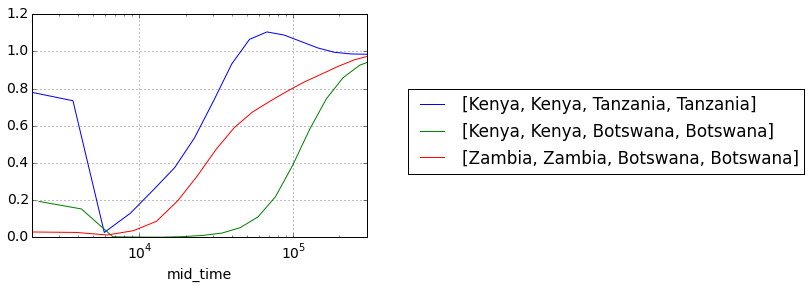

In [484]:
errors = []
for tpl in pygcyn_quadruples:
    try:
        ids = ["_".join(tpl[:2]),"_".join(tpl[2:])]
        cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']
        cross_coal_s.index = cross_coal_s.index*generation_time/mu
        cross_coal_s.name = mt.ix[list(tpl)]["country"].values
        cross_coal_s.plot(legend=True)
        ax = plt.gca()
    except Exception,e:
        errors.append(e)
ax.set_xlim([2000,300000])
ax.set_xscale('log')
l = ax.get_legend()
l.set_bbox_to_anchor((1.1, 0.7))

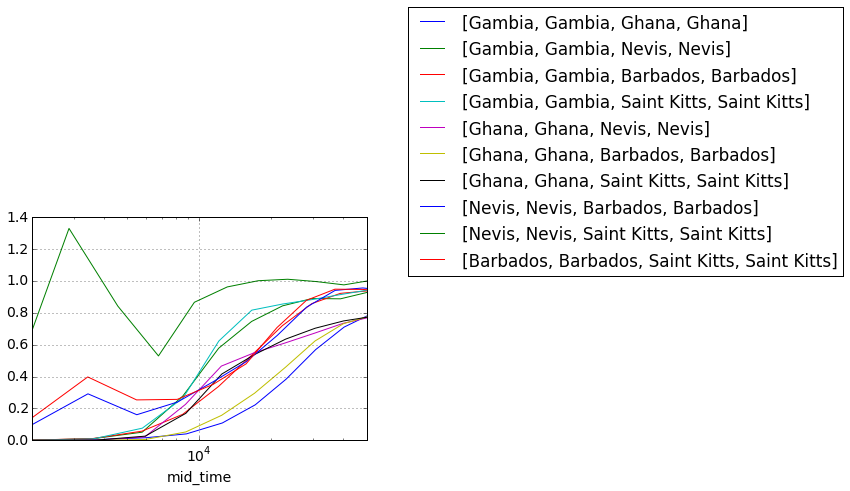

In [475]:
errors = []
for tpl in sabtan_quadruples:
    try:
        ids = ["_".join(tpl[:2]),"_".join(tpl[2:])]
        cross_coal_s = get_cross_coal_midpoint(*ids)['cross_coal']
        cross_coal_s.index = cross_coal_s.index*generation_time/mu
        cross_coal_s.name = mt.ix[list(tpl)]["country"].values
        cross_coal_s.plot(legend=True)
        ax = plt.gca()
    except Exception,e:
        errors.append(e)
ax.set_xlim([2000,50000])
ax.set_xscale('log')
l = ax.get_legend()
l.set_bbox_to_anchor((1.1, 0.7))